In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None) 

In [134]:
# reading the raining data

df = pd.read_csv('./dataset/train.csv')
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [135]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [136]:
df = df.drop(["Name", "security_no", "referral_id"], axis=1)
df.columns

Index(['customer_id', 'age', 'gender', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

In [137]:
# converting to suitable datatypes
df.dtypes

customer_id                      object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [138]:
df.dtypes

customer_id                      object
age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [139]:
# converting joining date

df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d', errors='coerce')
df.dtypes

customer_id                             object
age                                      int64
gender                                  object
region_category                         object
membership_category                     object
joining_date                    datetime64[ns]
joined_through_referral                 object
preferred_offer_types                   object
medium_of_operation                     object
internet_option                         object
last_visit_time                         object
days_since_last_login                    int64
avg_time_spent                         float64
avg_transaction_value                  float64
avg_frequency_login_days                object
points_in_wallet                       float64
used_special_discount                   object
offer_application_preference            object
past_complaint                          object
complaint_status                        object
feedback                                object
churn_risk_sc

In [140]:
# converting avg_frequency_login_days to numeric value

df['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
44.09610213841228         1
-1.527648918738869        1
-35.815757628160796       1
36.61576542913897         1
-17.806990615958206       1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [141]:
# average frequency of login cannot be negative or a string
# hence removing strings and negative values.

df['avg_frequency_login_days'].mode()

0    Error
dtype: object

In [142]:
# find a way to use this column as of now dropping the column
df = df.drop(["avg_frequency_login_days", "last_visit_time", "joining_date"], axis=1)
df.columns

Index(['customer_id', 'age', 'gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [143]:
df.dtypes

customer_id                      object
age                               int64
gender                           object
region_category                  object
membership_category              object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [144]:
# sentiment analysis on the feedback column
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['feedback'] = df['feedback'].apply(lambda x: 1 if(sia.polarity_scores(x)['compound'] >= 0) else -1) 
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yogesh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,customer_id,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,781.75,Yes,Yes,No,Not Applicable,1,2
1,fffe43004900440032003100300035003700,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,NaN,Yes,No,Yes,Solved,1,1
2,fffe4300490044003100390032003600,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,500.69,No,Yes,Yes,Solved in Follow-up,-1,5
3,fffe43004900440036003000330031003600,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,567.66,No,Yes,Yes,Unsolved,-1,5
4,fffe43004900440031003900350030003600,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,663.06,No,Yes,Yes,Solved,-1,5


In [145]:
df.isnull().sum()

customer_id                        0
age                                0
gender                             0
region_category                 5428
membership_category                0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [146]:
# assuming the mode of the regions as the value for the missing values

df['region_category'] = df['region_category'].fillna(df['region_category'].mode())
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode())

In [147]:
from sklearn.preprocessing import LabelEncoder
#Label Encoder to convert the color (categorical variables) to numeric trainable values

le = LabelEncoder()
categorical_features = ['gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status',]

for category in categorical_features:
    df[category] = le.fit_transform(df[category])

df.head()

,customer_id,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,18,0,2,3,1,1,0,2,17,300.63,53005.25,781.75,1,1,0,1,1,2
1,fffe43004900440032003100300035003700,32,0,0,4,0,1,2,1,16,306.34,12838.38,NaN,1,0,1,2,1,1
2,fffe4300490044003100390032003600,44,0,1,2,2,1,2,2,14,516.16,21027.00,500.69,0,1,1,3,-1,5
3,fffe43004900440036003000330031003600,37,1,0,2,2,1,2,1,11,53.27,25239.56,567.66,0,1,1,4,-1,5
4,fffe43004900440031003900350030003600,31,0,0,2,1,0,3,1,20,113.13,24483.66,663.06,0,1,1,2,-1,5


In [148]:
# for continuos feature points_in_wallet assuming the mean to be the vlaue for the missing value

df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].median())

In [149]:
df.isnull().sum()

customer_id                     0
age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [150]:
df.corr()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
age,1.000000,0.000819,0.004927,0.000388,-0.000723,-0.006511,-0.008131,0.011150,-0.003970,0.001531,-0.000473,0.000226,-0.005375,0.003090,0.001663,0.003429,-0.009869,0.002360
gender,0.000819,1.000000,0.000788,0.003766,-0.000883,0.000377,-0.001916,-0.004068,-0.007683,-0.009560,0.003694,-0.009265,-0.000728,0.000333,-0.008200,0.000301,-0.001646,-0.000005
region_category,0.004927,0.000788,1.000000,0.001438,-0.002319,-0.004702,-0.012591,0.008442,-0.000141,-0.000069,0.006857,-0.002464,0.007276,-0.006629,-0.006742,-0.004091,0.011180,-0.008409
membership_category,0.000388,0.003766,0.001438,1.000000,-0.007165,-0.018257,0.004391,0.004903,-0.000631,0.005885,0.094190,0.162864,0.007350,0.004544,-0.010205,-0.007075,0.119418,-0.354955
joined_through_referral,-0.000723,-0.000883,-0.002319,-0.007165,1.000000,0.004564,-0.011157,-0.004387,-0.006465,0.092134,-0.016558,-0.007602,0.016197,0.005444,-0.002156,0.001837,-0.023677,0.016487
preferred_offer_types,-0.006511,0.000377,-0.004702,-0.018257,0.004564,1.000000,-0.002103,0.003078,0.005182,-0.005297,-0.023321,-0.007165,0.001269,0.000810,-0.007319,-0.000100,-0.033192,0.033756
medium_of_operation,-0.008131,-0.001916,-0.012591,0.004391,-0.011157,-0.002103,1.000000,-0.007638,0.003089,-0.103395,-0.011733,0.001514,-0.025906,-0.026717,0.005613,0.000532,-0.011354,0.016173
internet_option,0.011150,-0.004068,0.008442,0.004903,-0.004387,0.003078,-0.007638,1.000000,-0.004221,-0.002078,-0.005848,0.003975,-0.001021,0.005341,-0.000529,-0.009356,0.002443,-0.003149
days_since_last_login,-0.003970,-0.007683,-0.000141,-0.000631,-0.006465,0.005182,0.003089,-0.004221,1.000000,-0.002369,0.003934,0.008735,-0.001641,-0.001697,-0.004185,0.001515,0.004036,-0.009918
avg_time_spent,0.001531,-0.009560,-0.000069,0.005885,0.092134,-0.005297,-0.103395,-0.002078,-0.002369,1.000000,0.020888,-0.000584,0.072625,0.071776,0.001408,0.002407,0.020481,-0.021052


<AxesSubplot:>

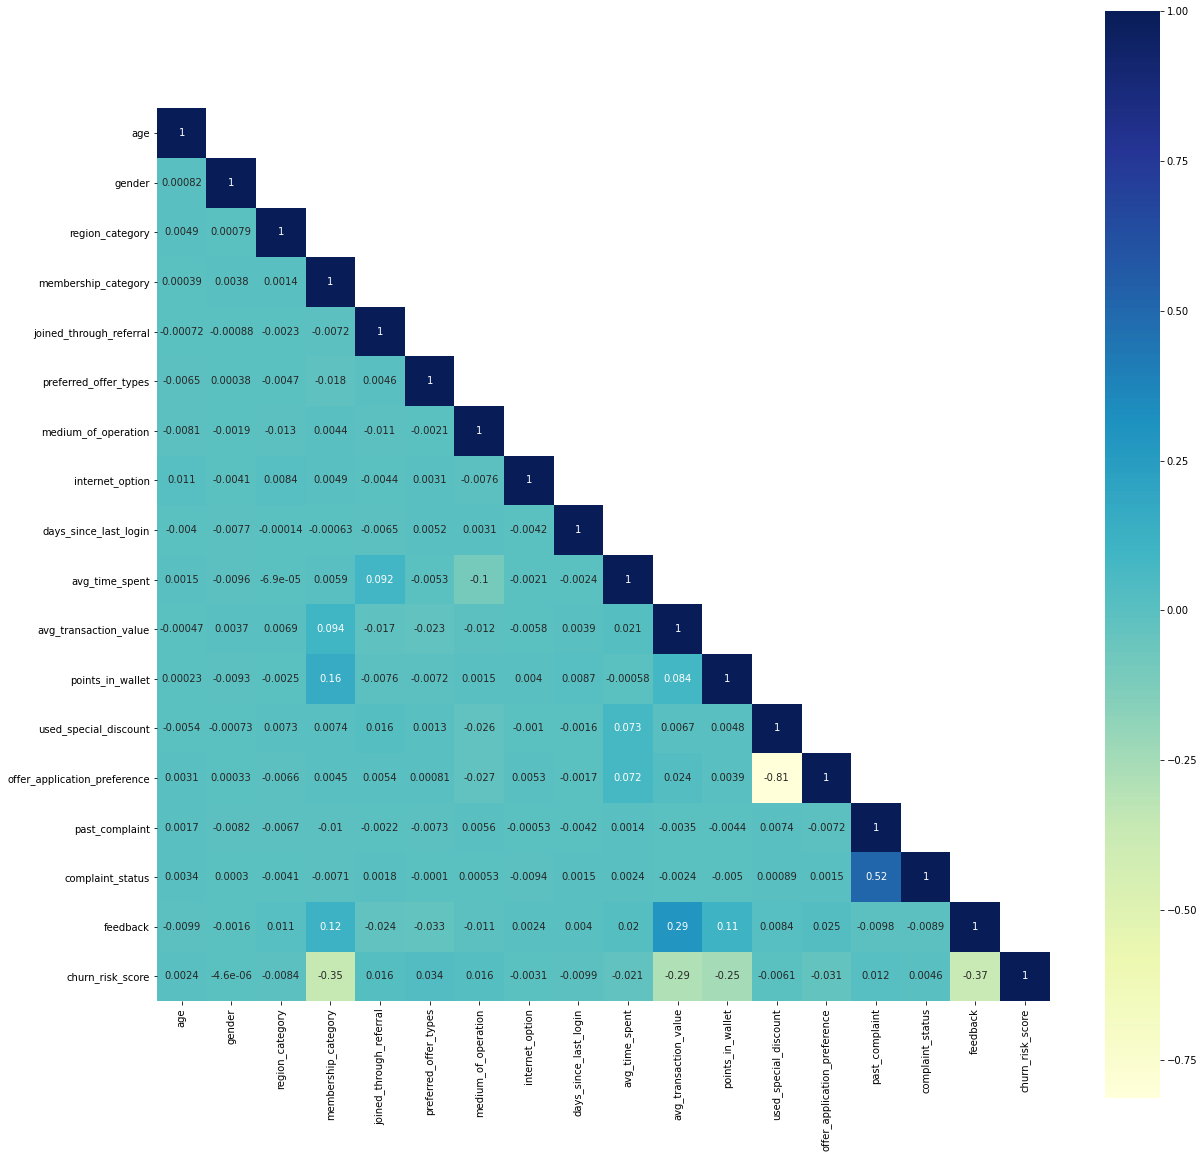

In [151]:
#Correlation between the values
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corr, mask=mask, square=True,annot=True, cmap="YlGnBu")

In [207]:
correlation = df.corr()
golden_features = list()
features = df.columns
for index, feature in enumerate(correlation["churn_risk_score"]):
    if float(abs(feature)) >= 0.005:
        golden_features.append(features[index])
print(golden_features)

['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'internet_option', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'complaint_status', 'feedback']


In [208]:
train = df
for feature in df.columns:
    if feature not in golden_features and feature != "churn_risk_score":
        train = train.drop([feature], axis=1)
train.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback,churn_risk_score
0,0,2,3,1,1,2,17,300.63,53005.25,781.75,1,1,1,1,2
1,0,0,4,0,1,1,16,306.34,12838.38,697.62,1,0,2,1,1
2,0,1,2,2,1,2,14,516.16,21027.00,500.69,0,1,3,-1,5
3,1,0,2,2,1,1,11,53.27,25239.56,567.66,0,1,4,-1,5
4,0,0,2,1,0,1,20,113.13,24483.66,663.06,0,1,2,-1,5


In [209]:
train.shape

(36992, 15)

In [211]:
X = train.iloc[:,1:train.shape[1]-1]
Y = train['churn_risk_score']
X.shape,Y.shape

((36992, 13), (36992,))

In [212]:
X.head()

,region_category,membership_category,joined_through_referral,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,complaint_status,feedback
0,2,3,1,1,2,17,300.63,53005.25,781.75,1,1,1,1
1,0,4,0,1,1,16,306.34,12838.38,697.62,1,0,2,1
2,1,2,2,1,2,14,516.16,21027.00,500.69,0,1,3,-1
3,0,2,2,1,1,11,53.27,25239.56,567.66,0,1,4,-1
4,0,2,1,0,1,20,113.13,24483.66,663.06,0,1,2,-1


In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 4)

In [214]:
X_train.shape

(27744, 13)

In [215]:
Y_train.shape

(27744,)

In [216]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [217]:
Y_predicted = classifier.predict(X_test)
Y_predicted

array([3, 4, 5, ..., 5, 1, 3])

In [218]:
from sklearn.metrics import f1_score
score = 100 * f1_score(Y_test, Y_predicted, average="macro")
score

54.70634736787739

In [219]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion = "entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [220]:
Y_predicted = classifier.predict(X_test)
Y_predicted

array([3, 4, 5, ..., 5, 1, 2])

In [221]:
score = 100 * f1_score(Y_test, Y_predicted, average="macro")
score

56.37906523629851

In [222]:
#XGBoost Classifier
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

/home/yogesh/dev/python/churn-modelling/venv/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
Y_predicted = classifier.predict(X_test)
Y_predicted

array([3, 4, 5, ..., 5, 1, 2])

In [224]:
score = 100 * f1_score(Y_test, Y_predicted, average="macro")
score

56.8080327282429